In [2]:
from __future__ import print_function

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
df = pd.read_csv('data/employee_data.csv')

In [4]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,nan,0.933,4,nan,low,0.830,Left,5.000
1,232,support,nan,nan,3,nan,low,0.835,Employed,2.000
2,184,sales,nan,0.789,3,nan,medium,0.835,Employed,3.000
3,206,sales,nan,0.576,4,nan,low,0.425,Employed,2.000
4,249,sales,nan,0.845,3,nan,low,0.779,Employed,3.000


In [5]:
df.shape

(14249, 10)

In [7]:
df.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

In [8]:
df.tail(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
14239,242,finance,nan,0.781,6,nan,low,0.670,Left,5.000
14240,131,engineering,nan,0.531,2,nan,low,0.342,Left,3.000
14241,235,IT,nan,0.683,3,nan,medium,0.924,Employed,3.000
14242,157,support,nan,0.707,5,nan,low,0.835,Employed,4.000
14243,272,engineering,nan,0.816,4,nan,low,0.693,Employed,2.000
14244,178,IT,nan,0.736,5,nan,low,0.263,Employed,5.000
14245,257,sales,nan,0.639,3,nan,low,0.868,Employed,2.000
14246,232,finance,1.000,0.848,5,nan,medium,0.899,Left,5.000
14247,130,IT,nan,0.757,4,nan,medium,0.641,Employed,3.000
14248,159,NaN,nan,0.579,3,nan,medium,0.809,Employed,3.000


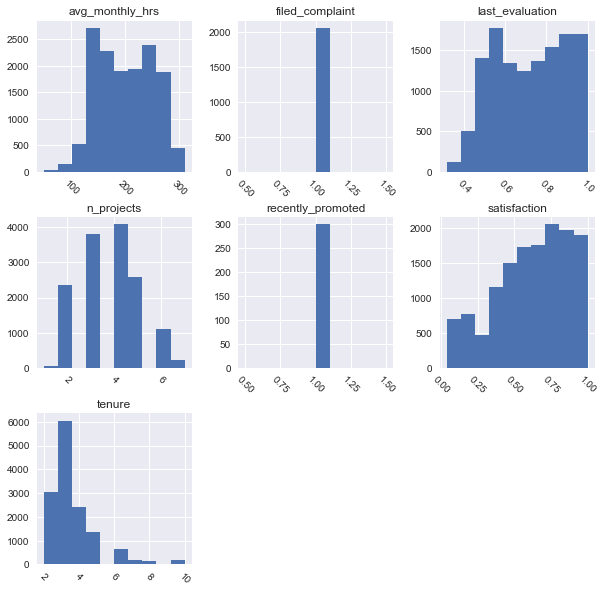

In [10]:
df.hist(figsize = (10,10), xrot = -45)
plt.show()

In [11]:
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000,2058.000,12717.000,14249.000,300.000,14068.000,14068.000
mean,199.796,1.000,0.718,3.774,1.000,0.621,3.497
std,50.999,0.000,0.173,1.253,0.000,0.250,1.461
min,49.000,1.000,0.316,1.000,1.000,0.040,2.000
25%,155.000,1.000,0.564,3.000,1.000,0.450,3.000
50%,199.000,1.000,0.725,4.000,1.000,0.653,3.000
75%,245.000,1.000,0.871,5.000,1.000,0.825,4.000
max,310.000,1.000,1.000,7.000,1.000,1.000,10.000


In [12]:
df.describe(include=['object'])

,department,salary,status
count,13540,14249,14249
unique,12,3,2
top,sales,low,Employed
freq,3923,6952,10857


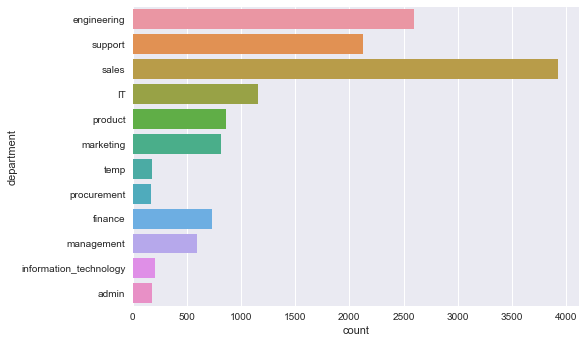

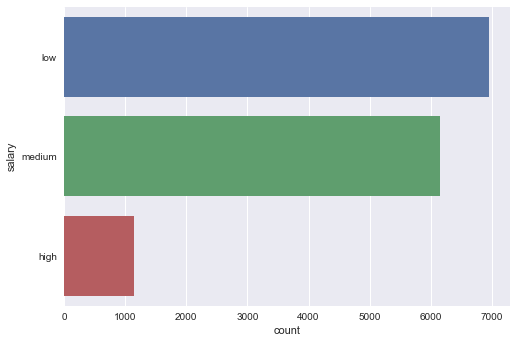

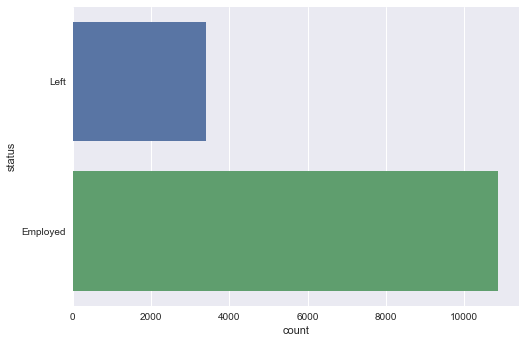

In [14]:
for name in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(y = name, data = df)
    plt.show()

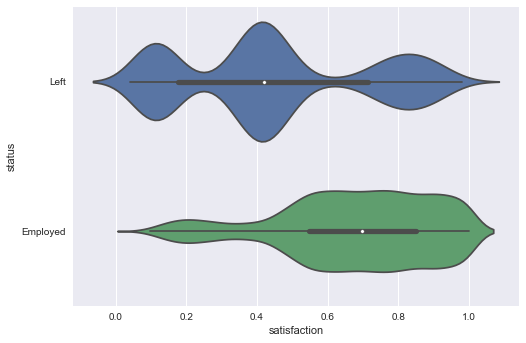

In [16]:
sns.violinplot(y = 'status', x = 'satisfaction', data = df)
plt.show()

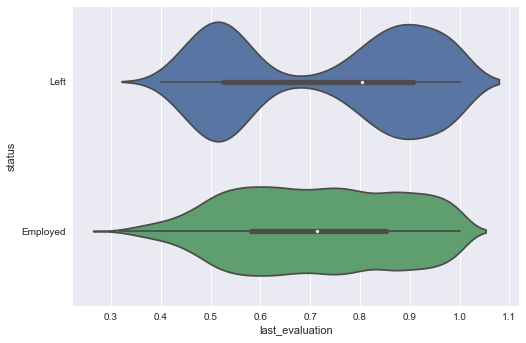

In [17]:
sns.violinplot(y = 'status', x = 'last_evaluation', data = df)
plt.show()

In [18]:
df.groupby('status').mean()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
status,,,,,,,
Employed,197.700,1.000,0.714,3.755,1.000,0.676,3.380
Left,206.503,1.000,0.731,3.833,1.000,0.447,3.869


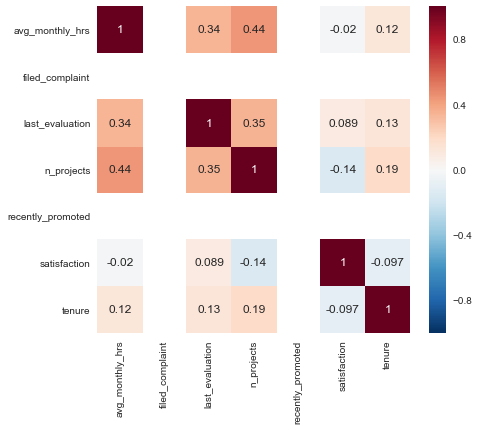

In [19]:
correlations = df.corr()
plt.figure(figsize = [7,6])
sns.set_style('white')
sns.heatmap(correlations, annot = True)
plt.show()

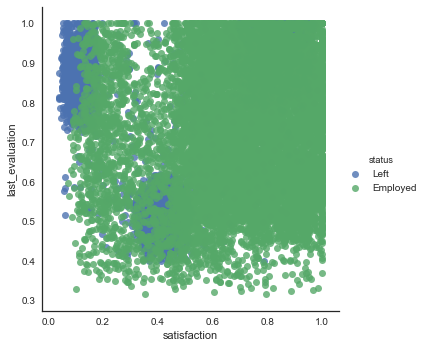

In [22]:
sns.lmplot(x = 'satisfaction', y = 'last_evaluation', 
           hue = 'status', data = df, fit_reg = False)
plt.show()

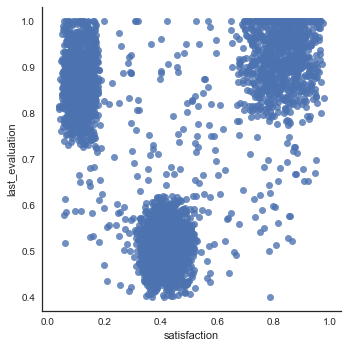

In [25]:
sns.lmplot(y = 'last_evaluation', x = 'satisfaction', 
           data = df[df.status == 'Left'], fit_reg = False)
plt.show()